In [26]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
table = pd.read_table('datasetDemo1.txt',header=None,names=["Attribute1","Attribute2","Attribute3","Category"])
table

,Attribute1,Attribute2,Attribute3,Category
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1
5,72993,10.141740,1.032955,1
6,35948,6.830792,1.213192,3
7,42666,13.276369,0.543880,3
8,67497,8.631577,0.749278,1
9,35483,12.273169,1.508053,3


In [94]:
m=table.values.shape[0]
train_num=int(m*0.9)
x_train=table.values[:train_num,:3]
y_train=table.values[:train_num,3].astype(np.int32)
x_test=table.values[train_num:m,:3]
y_test=table.values[train_num:m,3].astype(np.int32)

In [95]:
print("x_train:"+str(x_train.shape))
print("y_train:"+str(y_train.shape))
print("x_test:"+str(x_test.shape))
print("y_test:"+str(y_test.shape))

x_train:(900, 3)
y_train:(900,)
x_test:(100, 3)
y_test:(100,)


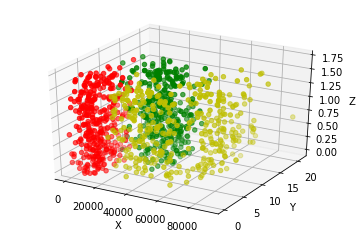

In [96]:
x, y, z,r = table.values[:,0], table.values[:,1], table.values[:,2],table.values[:,3]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[r==1], y[r==1], z[r==1], c='y') 
ax.scatter(x[r==2], y[r==2], z[r==2], c='r') 
ax.scatter(x[r==3], y[r==3], z[r==3], c='g') 
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [163]:
# 根据得到的结果集array计算最大频率的数字
def computeHignFrequencyNum(array):
    bin_index=np.bincount(array)
    result=np.argmax(bin_index)
    return result

#bincount测试
print("bincount测试")
print(np.bincount(np.array([1,8,5,6])))
# test
print("函数测试")
computeHignFrequencyNum(np.array([2,3,4,5,7,9,7]))

bincount测试
[0 1 0 0 0 1 1 0 1]
函数测试


7

In [164]:

class KNearestNeighbor(object):


    def __init__(self):
        pass

    # 输入训练数据集
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # 预测测试数据的分类结果
    def predict(self, X_test,y_test, k=1):
        dist = self.distance(X_test)
        num_test = X_test.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dist[i])[:k]]
            y_pred[i] = computeHignFrequencyNum(closest_y)
        return y_pred

    # 将测试数据按照特征值与训练数据进行L2距离计算
    def distance(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        
        dist = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist[i] = np.sqrt(np.sum(np.square(self.X_train - X_test[i]), axis=1))
        return dist

In [165]:
classify = KNearestNeighbor()
classify.train(x_train,y_train)
y_test_pred = classify.predict(x_test,y_test,k=3)
#输出测试准确率
acc = np.mean(y_test == y_test_pred)
print("the test accuracy is ",acc)

the test accuracy is  0.78


In [166]:
#归一化处理
def normalFeature(x):
    x_min = np.min(x,axis = 0)
    x_max = np.max(x,axis = 0)
    x_new = (x - x_min) / (x_max - x_min)
    
    return x_new,x_min,x_max

x_new,x_min,x_max = normalFeature(table.values[:,0:3])


x_new_train=x_new[:train_num,:]
y_new_train=y_train
x_new_test=x_new[train_num:m,:]
y_new_test=y_test

In [167]:
classify.train(x_new_train,y_new_train)
y_test_pred = classify.predict(x_new_test,y_new_test,k=3)
#输出测试准确率
acc = np.mean(y_test == y_test_pred)
print("the test accuracy is ",acc)

the test accuracy is  0.94


In [170]:
input = np.array([[10000,10,0.5]])
input_new = (input-x_min) / (x_max - x_min)
pred = classify.predict(input_new,y_new_test,k=3)
print("对于[10000,10,0.5]的输出为"+str(int(pred)))

对于[10000,10,0.5]的输出为2
